# Load Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical functions
from scipy import stats
from scipy.stats import randint

# Data preparation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation and evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Bagging techniques
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


# Stacking classifier
from mlxtend.classifier import StackingClassifier

# Load Dataset

In [2]:
import pandas as pd

# Load the 'survey.csv' file from your local directory
train_df = pd.read_csv('survey.csv')

# Display the shape of the DataFrame
print(train_df.shape)

# Display summary statistics of the DataFrame
print(train_df.describe())

# Display information about the DataFrame
print(train_df.info())


(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

# DATA CLEANING

In [3]:
# Calculating statistics for missing data
total_missing = train_df.isnull().sum().sort_values(ascending=False)
percentage_missing = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_data_stats = pd.concat([total_missing, percentage_missing], axis=1, keys=['Total Missing', 'Percentage'])

# Display the top 20 missing data statistics
top_missing_data = missing_data_stats.head(20)

# Print the missing data statistics
print(top_missing_data)


                           Total Missing  Percentage
comments                            1095    0.869738
state                                515    0.409055
work_interfere                       264    0.209690
self_employed                         18    0.014297
seek_help                              0    0.000000
obs_consequence                        0    0.000000
mental_vs_physical                     0    0.000000
phys_health_interview                  0    0.000000
mental_health_interview                0    0.000000
supervisor                             0    0.000000
coworkers                              0    0.000000
phys_health_consequence                0    0.000000
mental_health_consequence              0    0.000000
leave                                  0    0.000000
anonymity                              0    0.000000
Timestamp                              0    0.000000
wellness_program                       0    0.000000
Age                                    0    0.

In [4]:
# Drop columns with missing data
train_df.drop(['comments'], axis=1, inplace=True)
train_df.drop(['state'], axis=1, inplace=True)
train_df.drop(['Timestamp'], axis=1, inplace=True)

# Check if there's any missing data left
max_missing = train_df.isnull().sum().max()

# Display the first 5 rows of the DataFrame
train_df.head(5)


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# CLEANING NAN

In [5]:
# Assign default values for different data types
default_int = 0
default_string = 'NaN'
default_float = 0.0

# Create lists to categorize features by data type
int_features = ['Age']
string_features = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
float_features = []

# Replace missing values with default values
for feature in train_df:
    if feature in int_features:
        train_df[feature] = train_df[feature].fillna(default_int)
    elif feature in string_features:
        train_df[feature] = train_df[feature].fillna(default_string)
    elif feature in float_features:
        train_df[feature] = train_df[feature].fillna(default_float)
    else:
        print('Error: Feature %s not recognized.' % feature)

# Display the first few rows of the DataFrame
train_df.head()


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [6]:
# Display unique values in the 'Gender' column
unique_genders = train_df['Gender'].unique()
print(unique_genders)


['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [7]:
# Define lists of gender categories
male_categories = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man", "msle", "mail", "malr",
                   "cis man", "Cis Male", "cis male"]
trans_categories = ["trans-female", "something kinda male?", "queer/she/they", "non-binary", "nah", "all", "enby", "fluid",
                   "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman",
                   "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_categories = ["cis female", "f", "female", "woman",  "femake", "female ", "cis-female/femme", "female (cis)", "femail"]

# Clean and categorize gender values
for (index, row) in train_df.iterrows():
    gender = str.lower(row['Gender'])
    if gender in male_categories:
        train_df.at[index, 'Gender'] = 'male'
    elif gender in female_categories:
        train_df.at[index, 'Gender'] = 'female'
    elif gender in trans_categories:
        train_df.at[index, 'Gender'] = 'trans'

# Remove irrelevant gender values
invalid_gender_categories = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(invalid_gender_categories)]

# Display unique gender categories after cleaning
unique_genders_cleaned = train_df['Gender'].unique()
print(unique_genders_cleaned)


['female' 'male' 'trans']


In [8]:
# Fill missing age values with the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Replace age values less than 18 and greater than 120 with the median
age_series = pd.Series(train_df['Age'])
age_series[age_series < 18] = train_df['Age'].median()
train_df['Age'] = age_series
age_series = pd.Series(train_df['Age'])
age_series[age_series > 120] = train_df['Age'].median()
train_df['Age'] = age_series

# Create age ranges
train_df['age_range'] = pd.cut(train_df['Age'], [0, 20, 30, 65, 100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

# Replace missing 'self_employed' values with 'No' (as it's a rare occurrence)
train_df['self_employed'] = train_df['self_employed'].replace([default_string], 'No')

# Display unique values in the 'self_employed' column
unique_self_employed = train_df['self_employed'].unique()
print(unique_self_employed)


['No' 'Yes']


In [9]:
# Replace missing 'work_interfere' values with "Don't know" (as it's a rare occurrence)
train_df['work_interfere'] = train_df['work_interfere'].replace([default_string], "Don't know")

# Display unique values in the 'work_interfere' column
unique_work_interfere = train_df['work_interfere'].unique()
print(unique_work_interfere)


['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


# ENCODING DATA

In [10]:
# Create a dictionary to store label encodings
label_dict = {}

# Encode categorical data using LabelEncoder
for feature in train_df:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(train_df[feature])
    
    # Create a mapping between original labels and encoded labels
    label_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    
    # Transform the data column with label encoding
    train_df[feature] = label_encoder.transform(train_df[feature])
    
    # Store label mappings in the dictionary
    label_key = 'label_' + feature
    label_value = [*label_name_mapping]
    label_dict[label_key] = label_value

# Print label mappings
for key, value in label_dict.items():
    print(key, value)


label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

In [11]:
# Remove the 'Country' column from the DataFrame
train_df = train_df.drop(['Country'], axis=1)

# Display the first few rows of the DataFrame
train_df.head()


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


# TESTING FOR MISSING DATA

In [12]:
# Calculate missing data statistics
total_missing = train_df.isnull().sum().sort_values(ascending=False)
percent_missing = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

# Display the top 20 missing data statistics
top_missing_data = missing_data.head(20)

# Print the missing data statistics
print(top_missing_data)


                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0


# MATRIX TO COMPARE VARIABILITY BETWEEN VARIABLE CATEGORIES

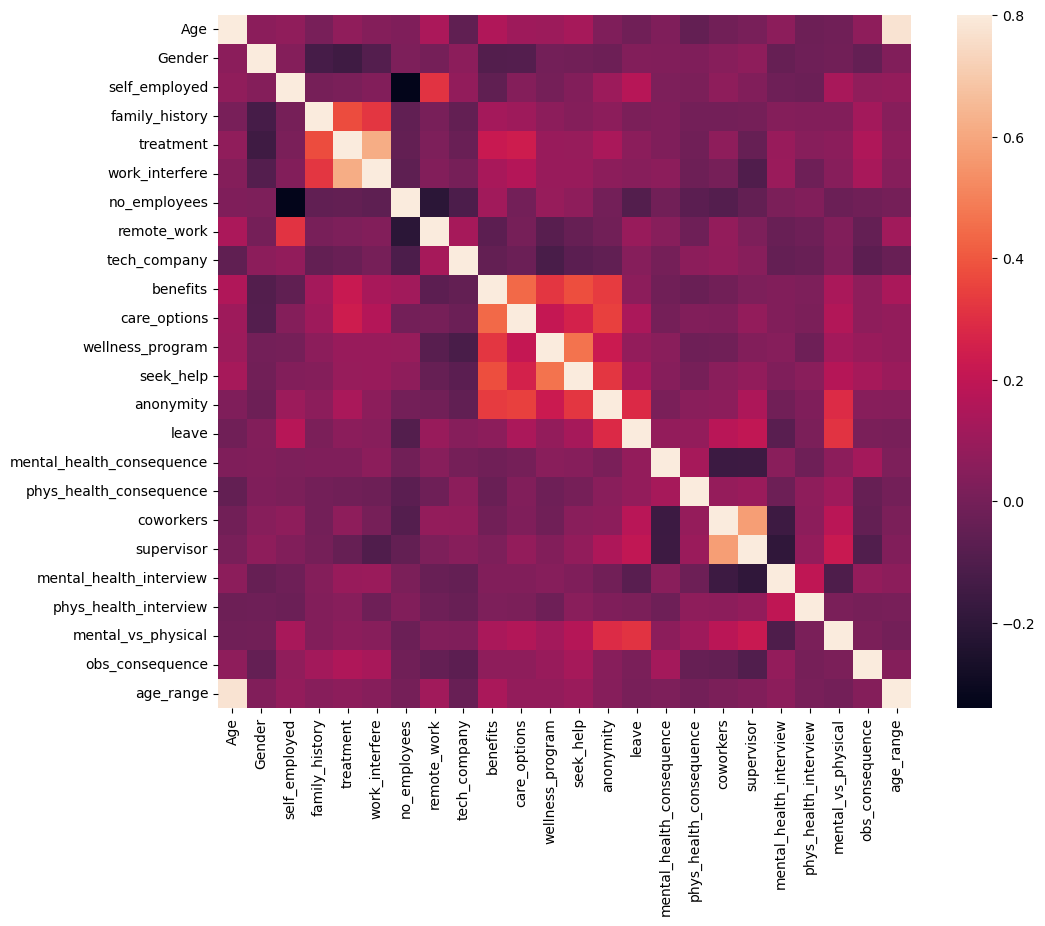

In [13]:
# Scale the 'Age' feature since it's significantly different from others
# Scaling code goes here...

# Calculate the covariance matrix to compare variability between variable categories
covariance_matrix = train_df.cov()

# Display the correlation matrix using a heatmap
corr_matrix = train_df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=0.8, square=True)
plt.show()


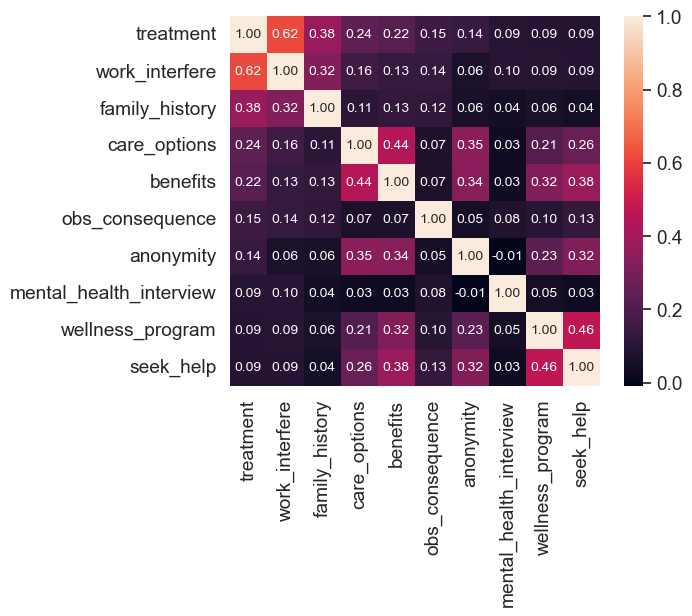

In [14]:
# Calculate the correlation matrix for the entire DataFrame
corrmat = train_df.corr()

# Select the top k variables for the 'treatment' variable
top_k = 10
correlation_columns = corrmat.nlargest(top_k, 'treatment')['treatment'].index

# Calculate the correlation matrix for the selected columns
correlation_matrix = np.corrcoef(train_df[correlation_columns].values.T)

# Set the font scale and display the heatmap
sns.set(font_scale=1.25)
heatmap = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=correlation_columns.values, xticklabels=correlation_columns.values)
plt.show()


# DATA RELATIONSHIP CHART

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

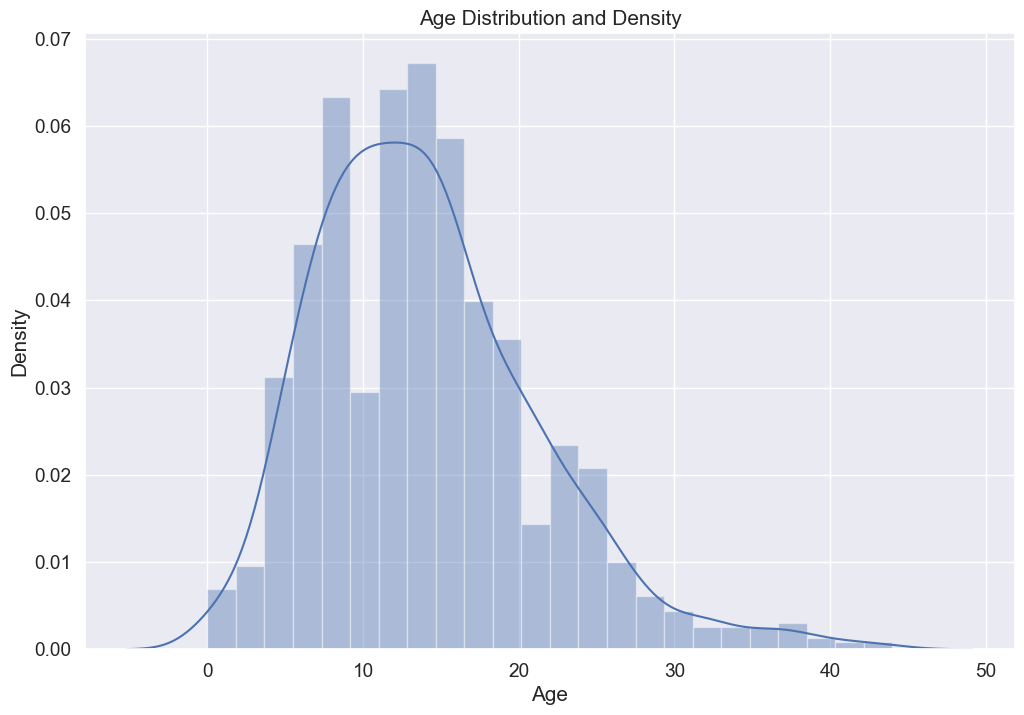

In [15]:
# Visualize the distribution and density of the 'Age' feature
plt.figure(figsize=(12, 8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Age Distribution and Density")
plt.xlabel("Age")


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


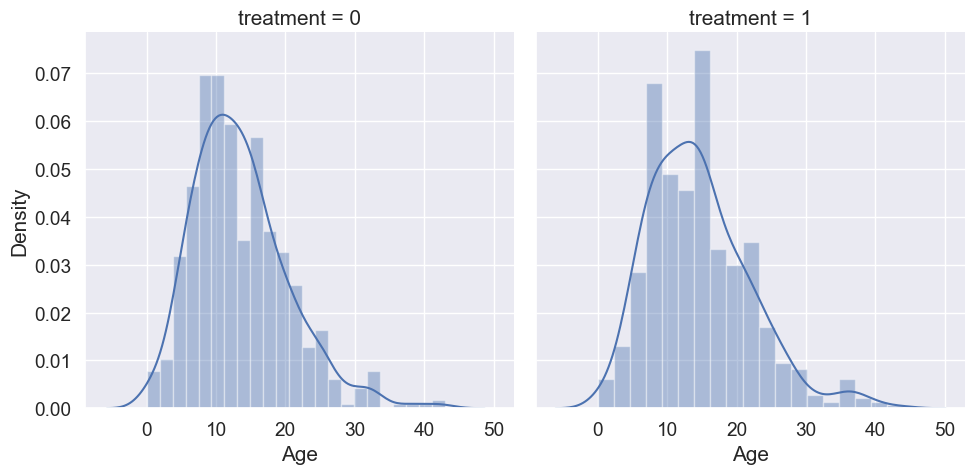

In [16]:
# Separate the 'Age' distribution by 'treatment'
facet_grid = sns.FacetGrid(train_df, col='treatment', height=5)
facet_grid = facet_grid.map(sns.distplot, "Age")


Text(0.5, 1.0, 'Distribution of Treatment Status')

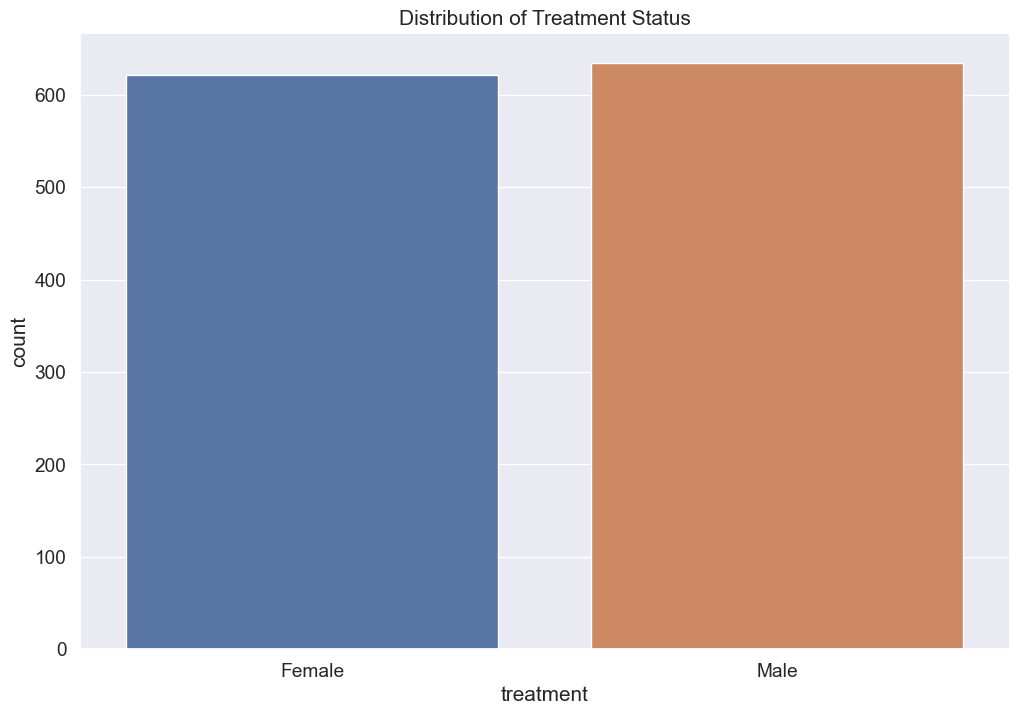

In [17]:
# Define labelDict with the labels you want
labelDict = {'label_Gender': ['Female', 'Male']}  # Replace 'Label1', 'Label2' with actual labels

# Count the number of people who have been treated
plt.figure(figsize=(12, 8))
gender_labels = labelDict['label_Gender']
treatment_plot = sns.countplot(x="treatment", data=train_df)
treatment_plot.set_xticklabels(gender_labels)
plt.title('Distribution of Treatment Status')


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


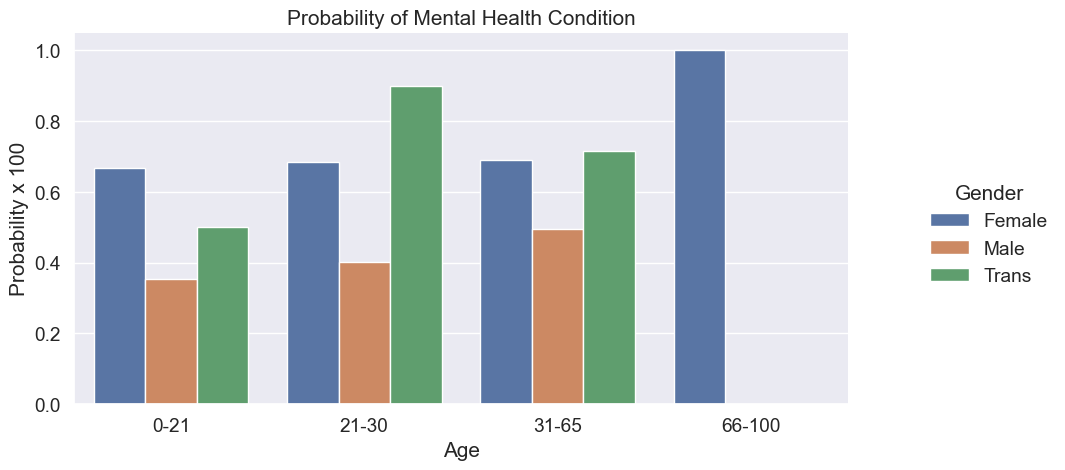

In [18]:
# Label the 'age_range' and 'Gender' categories
age_range_labels = ['0-21', '21-30', '31-65', '66-100']
gender_labels = ['Female', 'Male', 'Trans']
label_family_history = ['No','Yes']
care_option_labels = ['No','Not Sure','Yes']
label_benefits = ['Dont Know','No','Yes']
label_work_interfere = ['Dont Know','Never','Often','Rarely','Sometimes']

# Create a nested barplot to show probabilities for class and sex
plot = sns.factorplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out=True)
plot.set_xticklabels(age_range_labels)

# Set the title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels with 'Gender' labels
new_legend_labels = gender_labels
for text, label in zip(plot._legend.texts, new_legend_labels):
    text.set_text(label)

# Position the legend
plot.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


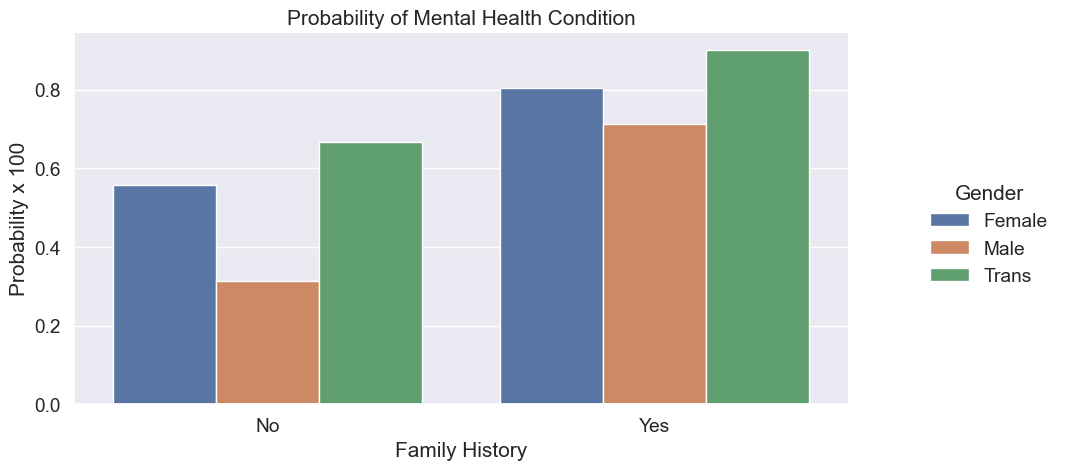

In [19]:
# Define labels for 'family_history'
family_history_labels = label_family_history

# Create a barplot to show probabilities for family history
bar_plot = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out=True)
bar_plot.set_xticklabels(family_history_labels)

# Set the title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# Replace legend labels with 'Gender' labels
new_legend_labels = gender_labels
for text, label in zip(bar_plot._legend.texts, new_legend_labels):
    text.set_text(label)

# Position the legend
bar_plot.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


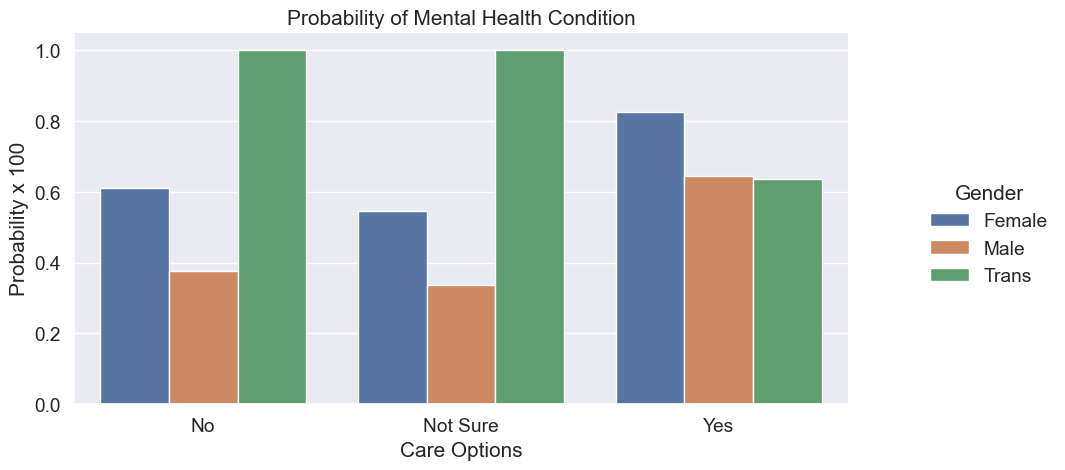

In [20]:
# Define labels for 'care_options'
care_options_labels = care_option_labels

# Create a barplot to show probabilities for care options
bar_plot = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out=True)
bar_plot.set_xticklabels(care_options_labels)

# Set the title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care Options')

# Replace legend labels with 'Gender' labels
new_legend_labels = gender_labels
for text, label in zip(bar_plot._legend.texts, new_legend_labels):
    text.set_text(label)

# Position the legend
bar_plot.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


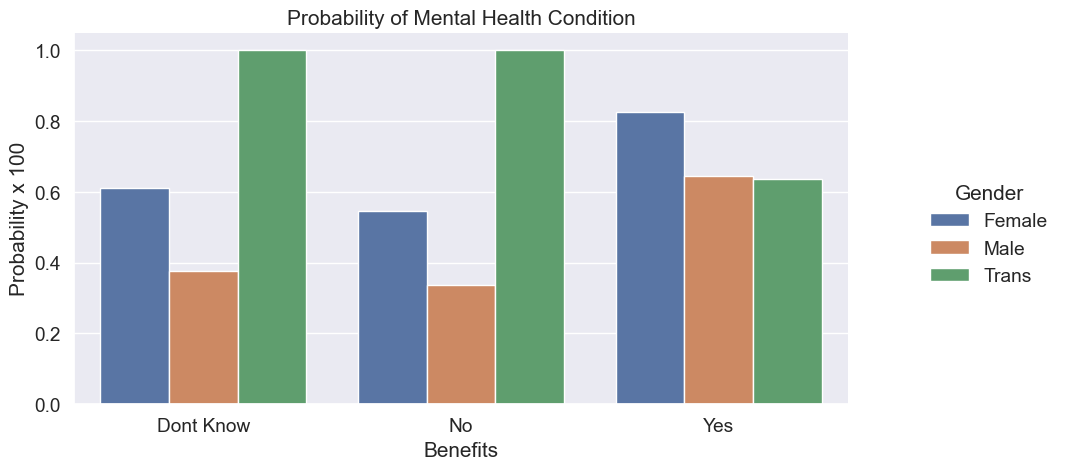

In [21]:
# Define labels for 'benefits'
benefits_labels = label_benefits

# Create a barplot to show probabilities for care options
bar_plot = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out=True)
bar_plot.set_xticklabels(benefits_labels)

# Set the title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# Replace legend labels with 'Gender' labels
new_legend_labels = gender_labels
for text, label in zip(bar_plot._legend.texts, new_legend_labels):
    text.set_text(label)

# Position the legend
bar_plot.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


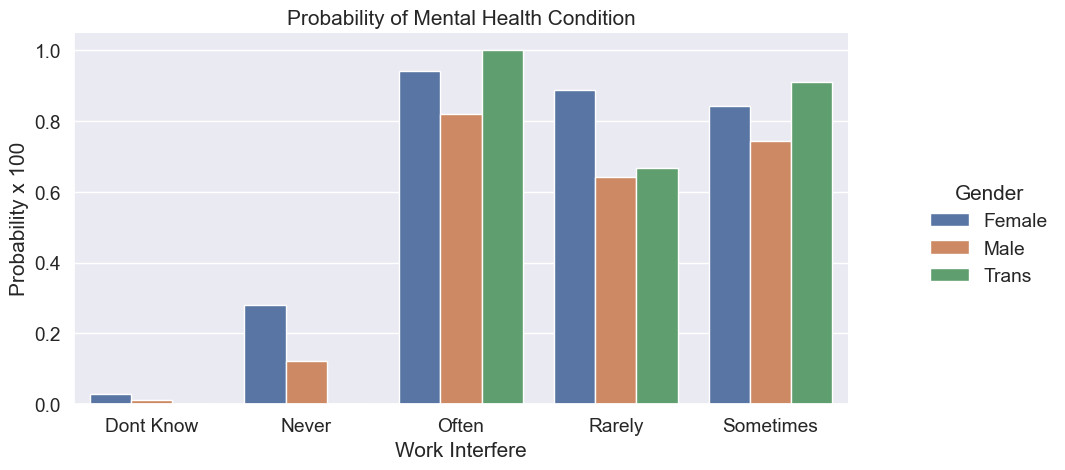

In [22]:
# Define labels for 'work_interfere'
work_interfere_labels = label_work_interfere

# Create a barplot to show probabilities for work interfere
bar_plot = sns.factorplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out=True)
bar_plot.set_xticklabels(work_interfere_labels)

# Set the title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work Interfere')

# Replace legend labels with 'Gender' labels
new_legend_labels = gender_labels
for text, label in zip(bar_plot._legend.texts, new_legend_labels):
    text.set_text(label)

# Position the legend
bar_plot.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


# SCALING AND FITTING

In [23]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the 'Age' feature
train_df['Age'] = scaler.fit_transform(train_df[['Age']])

# Display the first few rows of the DataFrame with the scaled 'Age'
train_df.head()


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2



# SPLITTING THE DATASET

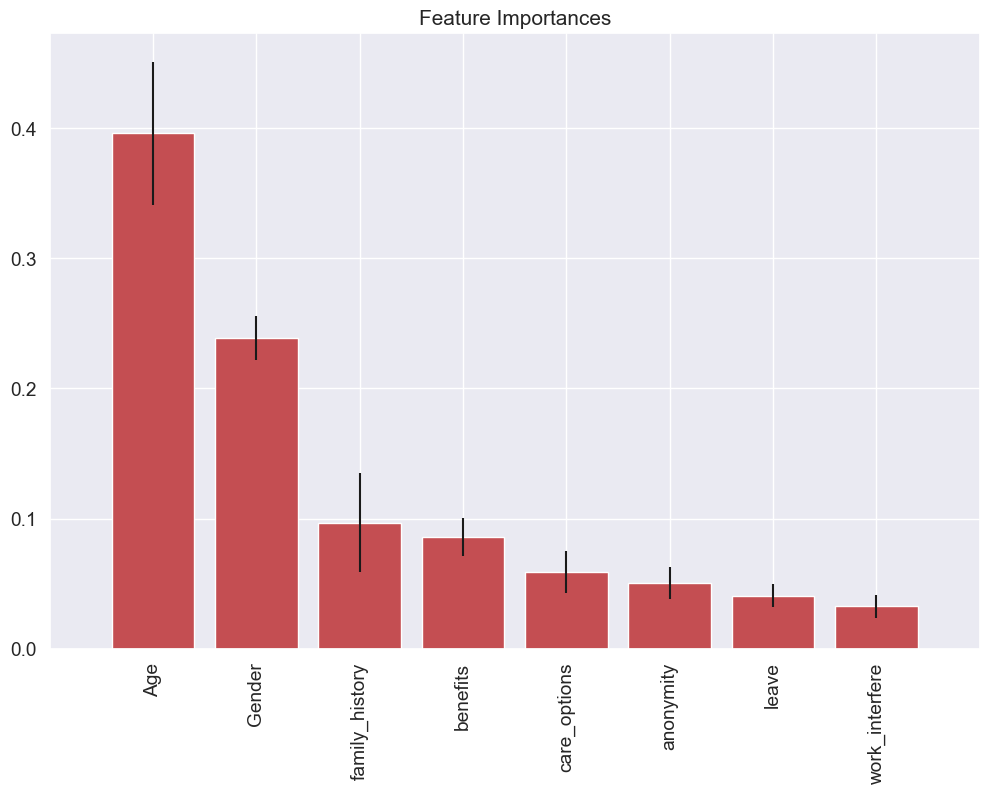

In [24]:

# Define the feature columns
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']

# Separate the dataset into features (X) and the target variable (y)
X = train_df[feature_cols]
y = train_df.treatment

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Initialize dictionaries for results
methodDict = {}
rmseDict = ()

# Build an Extra Trees Classifier and calculate feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Create labels for features
labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim(-1, X.shape[1])  # Corrected the mismatched parentheses here
plt.show()


# TUNING

In [25]:
def evaluate_classification_model(model, y_test, y_pred_class, plot=False):
    # Classification accuracy: percentage of correct predictions
    accuracy = accuracy_score(y_test, y_pred_class)
    print('Accuracy:', accuracy)
    
    # Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    y_test_value_counts = y_test.value_counts()
    print('Null accuracy:\n', y_test_value_counts)
    
    # Calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # Calculate the percentage of zeros
    print('Percentage of zeros:', 1 - y_test.mean())
    
    # Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    # Create a DataFrame for better visualization
    results_df = pd.DataFrame({'Index': X_test.index, 'Expected': y_test, 'Predicted': y_pred_class})

# Display the DataFrame
    print(results_df.head())

    # Confusion matrix
    confusion = confusion_matrix(y_test, y_pred_class)
    TP, TN, FP, FN = confusion[1, 1], confusion[0, 0], confusion[0, 1], confusion[1, 0]
    
    # Visualize Confusion Matrix
    sns.heatmap(confusion, annot=True, fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Metrics computed from a confusion matrix
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - accuracy)
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    print('AUC Score:', roc_auc_score(y_test, y_pred_class))
    
    # Calculate cross-validated AUC
    cross_val_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()
    print('Cross-validated AUC:', cross_val_auc)
    
    # Adjusting the classification threshold
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot:
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
        plt.xlim(0, 1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    


    y_pred_prob = y_pred_prob.reshape(-1, 1)
    binarizer = Binarizer(threshold=0.3)
    y_pred_class = binarizer.transform(y_pred_prob)
    
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    # ROC Curves and Area Under the Curve (AUC)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # Evaluate with different thresholds
    def evaluate_threshold(threshold):
        specificity = 1 - fpr[thresholds > threshold][-1]
        print('Specificity for ' + str(threshold) + ' :', specificity)
    
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    return accuracy


# TUNING WITH CROSS VALIDATION

In [26]:
def tune_knn_with_cross_validation(X, y):
    # Create a list of possible values for K (number of neighbors)
    k_range = list(range(1, 31))
    
    # Initialize a list to store the mean cross-validated accuracy for each K
    k_scores = []
    
    # Iterate over the values of K and compute cross-validated accuracy for each K
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    
    # Plot the results to visualize the relationship between K and cross-validated accuracy
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.title('Tuning K for KNN with Cross-Validation')
    plt.show()



# Tuning with GridSearchCV

In [27]:
def tune_knn_with_grid_search(X, y):
    # Define the range of values for K
    k_range = list(range(1, 31))

    # Create a parameter grid for GridSearchCV
    param_grid = {'n_neighbors': k_range}

    # Initialize a KNeighborsClassifier
    knn = KNeighborsClassifier()

    # Create a GridSearchCV instance
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # Fit the grid to the data
    grid.fit(X, y)

    # Get and print the best parameters and score
    best_k = grid.best_params_['n_neighbors']
    best_score = grid.best_score_
    print(f'Best K: {best_k}')
    print(f'Best Accuracy: {best_score}')

    # Get the cross-validated scores for all values of K
    scores = grid.cv_results_['mean_test_score']

    # Plot the results
    plt.plot(k_range, scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.title('Tuning K for KNN with GridSearchCV')
    plt.show()



# Tuning with RandomizedSearchCV

In [28]:
def tune_with_randomized_search(model, param_dist, X, y):
    # Create a RandomizedSearchCV instance
    rand = RandomizedSearchCV(model, param_distributions=param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

    # Fit the randomized search to the data
    rand.fit(X, y)

    # Get and print the best model's score and parameters
    best_score = rand.best_score_
    best_params = rand.best_params_
    print('Randomized Search Best Score:', best_score)
    print('Randomized Search Best Parameters:', best_params)

    # Run RandomizedSearchCV 20 times (with n_iter=10) and record the best scores
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_distributions=param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    
    print('Best Scores from 20 Runs:', best_scores)


# Tuning with searching multiple parameters simultaneously

In [29]:
def tune_with_multiple_parameters(knn, X, y):
    # Define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']

    # Create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print('Parameter Grid:', param_grid)

    # Instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)

    # View the complete results
    print('GridSearch Results:', grid.cv_results_)

    # Examine the best model
    best_score = grid.best_score_
    best_params = grid.best_params_
    print('Best Score:', best_score)
    print('Best Parameters:', best_params)

# Example usage:
# tune_with_multiple_parameters(knn, X, y)


# EVALUATING MODELS

Accuracy: 0.7962962962962963
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]
     Index  Expected  Predicted
5        5         0          1
494    494         0          0
52      52         0          0
984    984         0          0
186    186         0          1


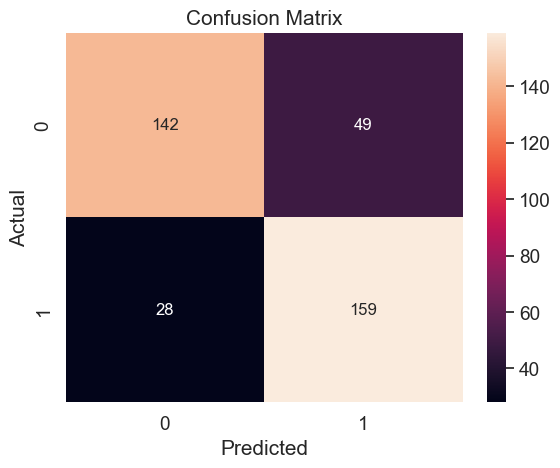

Classification Accuracy: 0.7962962962962963
Classification Error: 0.20370370370370372
False Positive Rate: 0.25654450261780104
Precision: 0.7644230769230769
AUC Score: 0.7968614385306716
Cross-validated AUC: 0.8753623882722146
First 10 predicted probabilities:
 [[0.90806947]
 [0.04008436]
 [0.03452533]
 [0.21242879]
 [0.61040078]
 [0.94735793]
 [0.24964426]
 [0.80934884]
 [0.38387919]
 [0.52300037]]


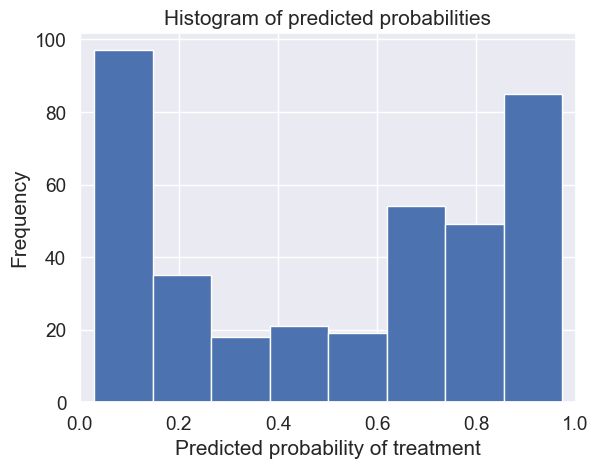

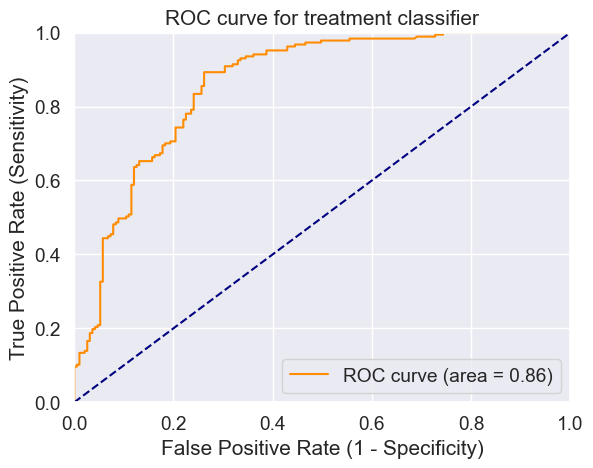

[[142  49]
 [ 28 159]]


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import binarize
from sklearn.preprocessing import Binarizer
from sklearn.metrics import roc_curve


def logistic_regression():
    # Train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    joblib.dump(logreg, 'logistic_regression_model.pkl')
    
    # Make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    # Evaluate the logistic regression model and calculate accuracy
    accuracy_score = evaluate_classification_model(logreg, y_test, y_pred_class, True)
    
    # Store the accuracy score for final graph
    methodDict['Logistic Regression'] = accuracy_score * 100
    

# Call the logistic_regression function to train and evaluate the model
logistic_regression()


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Randomized Search Best Score: 0.8213819226750262
Randomized Search Best Parameters: {'weights': 'uniform', 'n_neighbors': 29}


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Best Scores from 20 Runs: [0.819, 0.815, 0.821, 0.819, 0.821, 0.819, 0.816, 0.817, 0.816, 0.816, 0.819, 0.817, 0.817, 0.819, 0.816, 0.816, 0.816, 0.802, 0.816, 0.802]
Accuracy: 0.8042328042328042
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]
     Index  Expected  Predicted
5        5         0          1
494    494         0          0
52      52         0          0
984    984         0          0
186    186         0          1


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


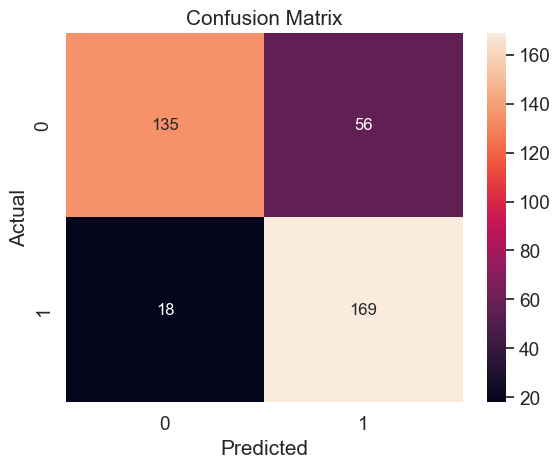

Classification Accuracy: 0.8042328042328042
Classification Error: 0.1957671957671958
False Positive Rate: 0.2931937172774869
Precision: 0.7511111111111111
AUC Score: 0.8052747991152673
Cross-validated AUC: 0.8784644661702792
First 10 predicted probabilities:
 [[0.66666667]
 [0.        ]
 [0.        ]
 [0.33333333]
 [0.62962963]
 [0.96296296]
 [0.40740741]
 [0.62962963]
 [0.66666667]
 [0.66666667]]


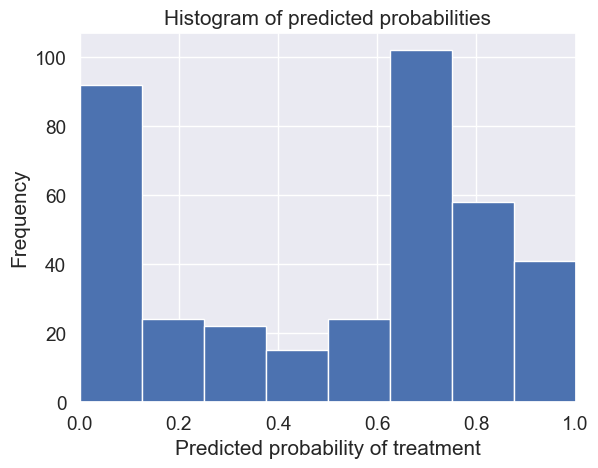

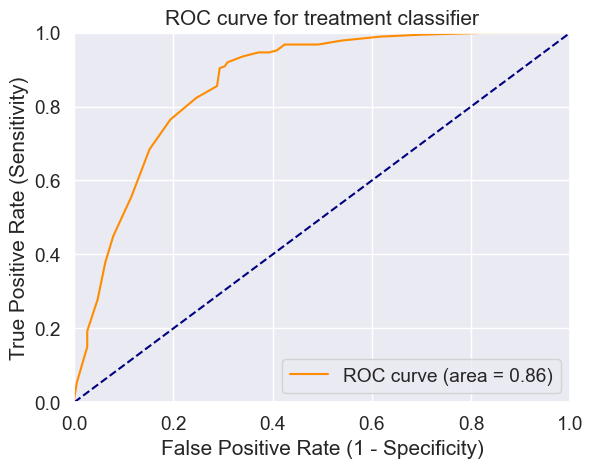

[[135  56]
 [ 18 169]]


In [41]:
# Define a function for K-Nearest Neighbors (KNN) classification
import joblib
def perform_knn_classification():
    # Create a KNeighborsClassifier with an initial setting of 5 neighbors
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # Define a range of values for the number of neighbors to search over
    k_range = list(range(1, 31))
    
    # Define two options for the weighting of neighbors
    weight_options = ['uniform', 'distance']
    
    # Create a dictionary of parameter distributions for RandomizedSearchCV
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    
    # Use the provided function to perform randomized search for optimal parameters
    tune_with_randomized_search(knn, param_dist, X_train, y_train)
    
    # Train a KNeighborsClassifier model with optimized parameters
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred_class = knn.predict(X_test)
    
    # Evaluate the model's performance and calculate accuracy
    accuracy_score = evaluate_classification_model(knn, y_test, y_pred_class, True)

    # Store the accuracy score in a dictionary for a final graph
    methodDict['K-Neighbors'] = accuracy_score * 100
    
    joblib.dump(knn, 'knn_model.pkl')

# Call the Knn function to perform KNN classification
perform_knn_classification()

Randomized Search Best Score: 0.8407001044932081
Randomized Search Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
Best Scores from 20 Runs: [0.837, 0.841, 0.841, 0.786, 0.841, 0.841, 0.841, 0.841, 0.84, 0.841, 0.826, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841]
Accuracy: 0.8068783068783069
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]
     Index  Expected  Predicted
5        5         0          1
494    494         0          0
52      52         0          0
984    984         0          0
186    186         0          1


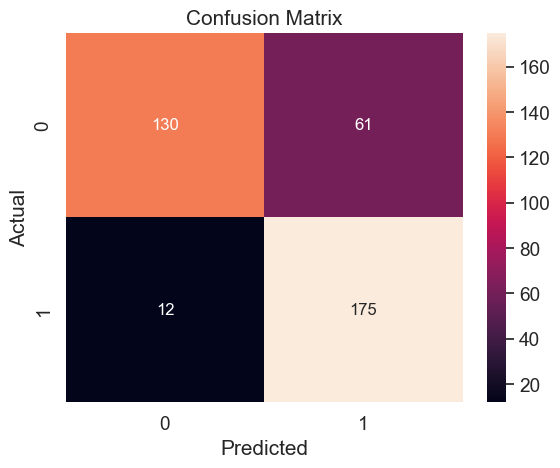

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.3193717277486911
Precision: 0.7415254237288136
AUC Score: 0.8082285746283282
Cross-validated AUC: 0.8862210292569837
First 10 predicted probabilities:
 [[0.81176471]
 [0.02040816]
 [0.        ]
 [0.1221374 ]
 [0.63902439]
 [0.94827586]
 [0.1221374 ]
 [0.88679245]
 [0.63902439]
 [0.63902439]]


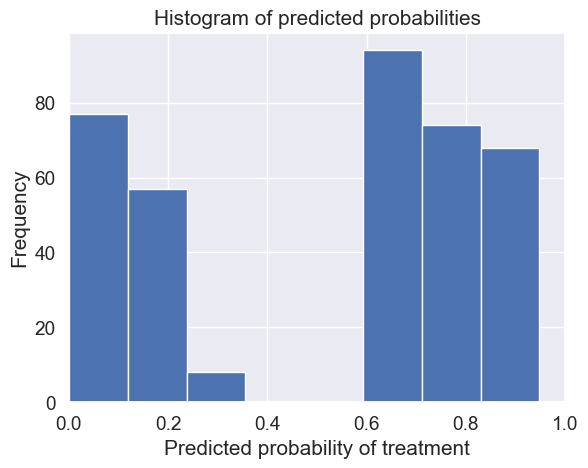

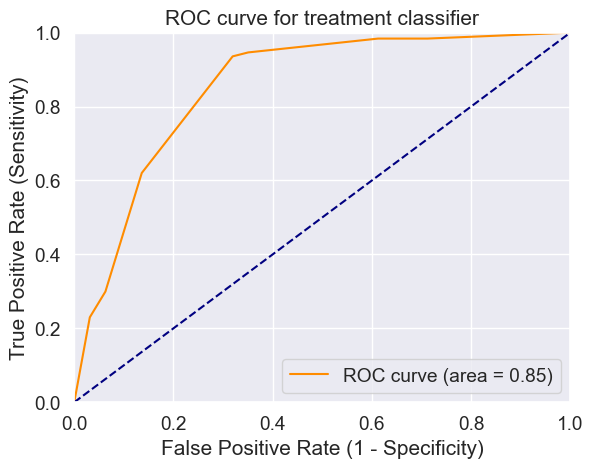

[[130  61]
 [ 12 175]]


In [34]:
# Define a function for Decision Tree Classifier
def perform_decision_tree_classification():
    # Create a DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    
    # Calculate the number of features
    features_size = len(feature_cols)
    
    # Define a dictionary of parameter distributions for RandomizedSearchCV
    param_dist = {
        "max_depth": [3, None],
        "max_features": randint(1, features_size),
        "min_samples_split": randint(2, 9),
        "min_samples_leaf": randint(1, 9),
        "criterion": ["gini", "entropy"]
    }
    
    # Use the provided function to perform randomized search for optimal parameters
    tune_with_randomized_search(tree, param_dist, X_train, y_train)
    
    # Train a DecisionTreeClassifier model with optimized parameters
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    joblib.dump(tree, 'decision_tree_model.pkl')
    
    # Make predictions on the testing set
    y_pred_class = tree.predict(X_test)
    
    # Evaluate the model's performance and calculate accuracy
    accuracy_score = evaluate_classification_model(tree, y_test, y_pred_class, True)

    # Store the accuracy score in a dictionary for a final graph
    methodDict['Decision Tree Classifier'] = accuracy_score * 100
    
    

# Call the perform_decision_tree_classification function to perform Decision Tree classification
perform_decision_tree_classification()


Randomized Search Best Score: 0.8407001044932081
Randomized Search Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
Best Scores from 20 Runs: [0.841, 0.841, 0.842, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841, 0.841]
Accuracy: 0.8121693121693122
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]
     Index  Expected  Predicted
5        5         0          1
494    494         0          0
52      52         0          0
984    984         0          0
186    186         0          1


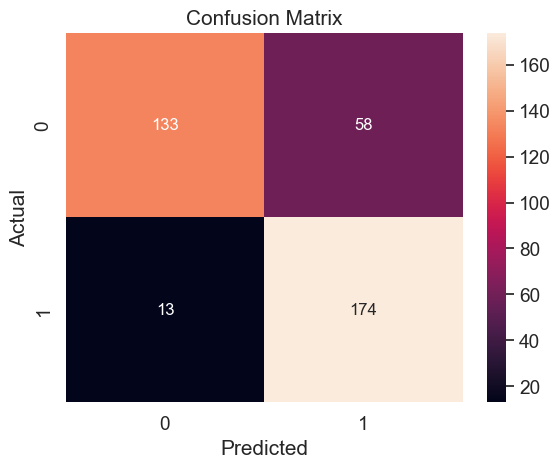

Classification Accuracy: 0.8121693121693122
Classification Error: 0.1878306878306878
False Positive Rate: 0.3036649214659686
Precision: 0.75
AUC Score: 0.8134081809782457
Cross-validated AUC: 0.8934280651104528
First 10 predicted probabilities:
 [[0.7444206 ]
 [0.04930917]
 [0.06148991]
 [0.12903403]
 [0.59346446]
 [0.82717042]
 [0.10549552]
 [0.5934088 ]
 [0.79459369]
 [0.80662356]]


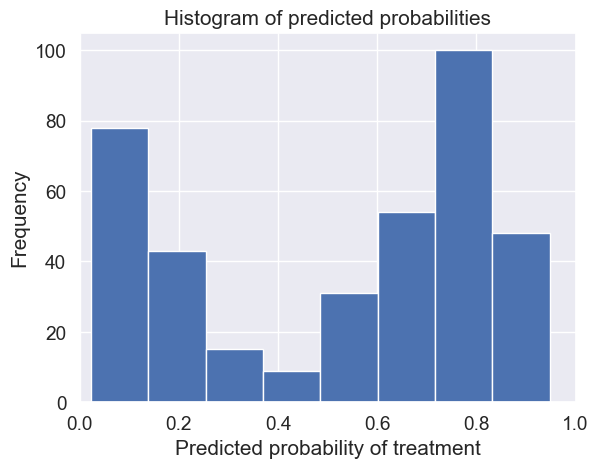

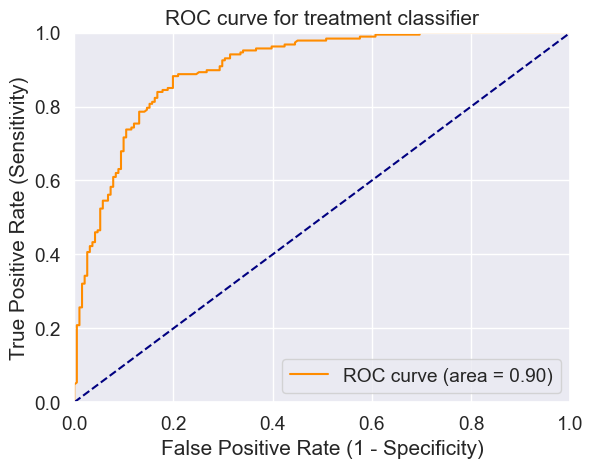

[[133  58]
 [ 13 174]]


In [35]:
# Define a function for Random Forest Classifier
def perform_random_forest_classification():
    # Create a RandomForestClassifier with an initial setting of 20 estimators
    forest = RandomForestClassifier(n_estimators=20)

    # Calculate the number of features
    features_size = len(feature_cols)
    
    # Define a dictionary of parameter distributions for RandomizedSearchCV
    param_dist = {
        "max_depth": [3, None],
        "max_features": randint(1, features_size),
        "min_samples_split": randint(2, 9),
        "min_samples_leaf": randint(1, 9),
        "criterion": ["gini", "entropy"]
    }
    
    # Use the provided function to perform randomized search for optimal parameters
    tune_with_randomized_search(forest, param_dist, X_train, y_train)
    
    # Build and fit the Random Forest model with optimized parameters
    forest = RandomForestClassifier(max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=20, random_state=1)
    my_forest = forest.fit(X_train, y_train)
    
    joblib.dump(my_forest, 'random_forest_model.pkl')
    
    # Make predictions on the testing set
    y_pred_class = my_forest.predict(X_test)
    
    # Evaluate the model's performance and calculate accuracy
    accuracy_score = evaluate_classification_model(my_forest, y_test, y_pred_class, True)

    # Store the accuracy score in a dictionary for a final graph
    methodDict['Random Forest'] = accuracy_score * 100

# Call the perform_random_forest_classification function to perform Random Forest classification
perform_random_forest_classification()


Accuracy: 0.8174603174603174
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]
     Index  Expected  Predicted
5        5         0          1
494    494         0          0
52      52         0          0
984    984         0          0
186    186         0          0


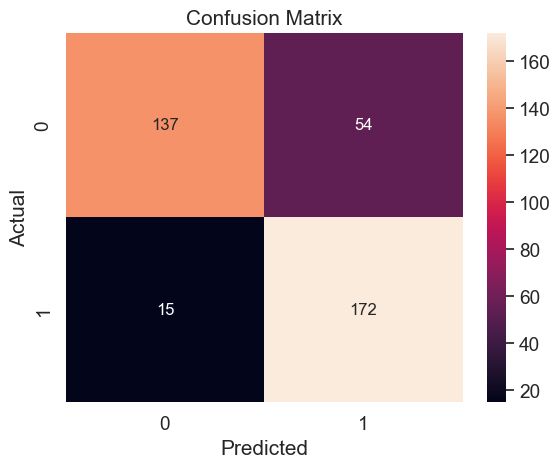

Classification Accuracy: 0.8174603174603174
Classification Error: 0.18253968253968256
False Positive Rate: 0.28272251308900526
Precision: 0.7610619469026548
AUC Score: 0.8185317915838397
Cross-validated AUC: 0.8746279095195426
First 10 predicted probabilities:
 [[0.50075445]
 [0.49714493]
 [0.49708214]
 [0.49872212]
 [0.49986448]
 [0.50203843]
 [0.49953629]
 [0.50060517]
 [0.50078243]
 [0.50102867]]


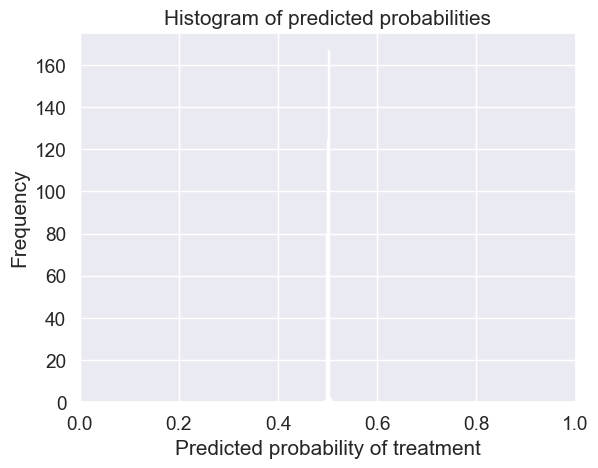

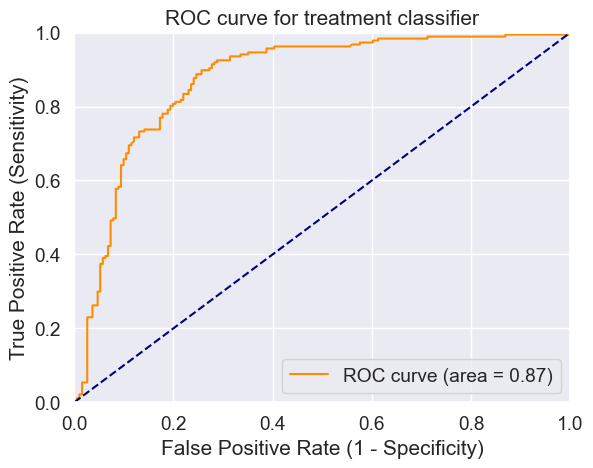

[[137  54]
 [ 15 172]]


In [36]:
# Define a function for Boosting with AdaBoost
def perform_boosting():
    # Create a DecisionTreeClassifier with 'entropy' criterion and max_depth of 1
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    
    # Create an AdaBoostClassifier with 500 estimators using the decision tree as the base estimator
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    
    joblib.dump(boost, 'adaboost_model.pkl')
    
    # Make class predictions for the testing set
    y_pred_class = boost.predict(X_test)
    
    # Evaluate the model's performance and calculate accuracy
    accuracy_score = evaluate_classification_model(boost, y_test, y_pred_class, True)

    # Store the accuracy score in a dictionary for a final graph
    methodDict['Boosting'] = accuracy_score * 100

# Call the perform_boosting function to perform Boosting with AdaBoost
perform_boosting()


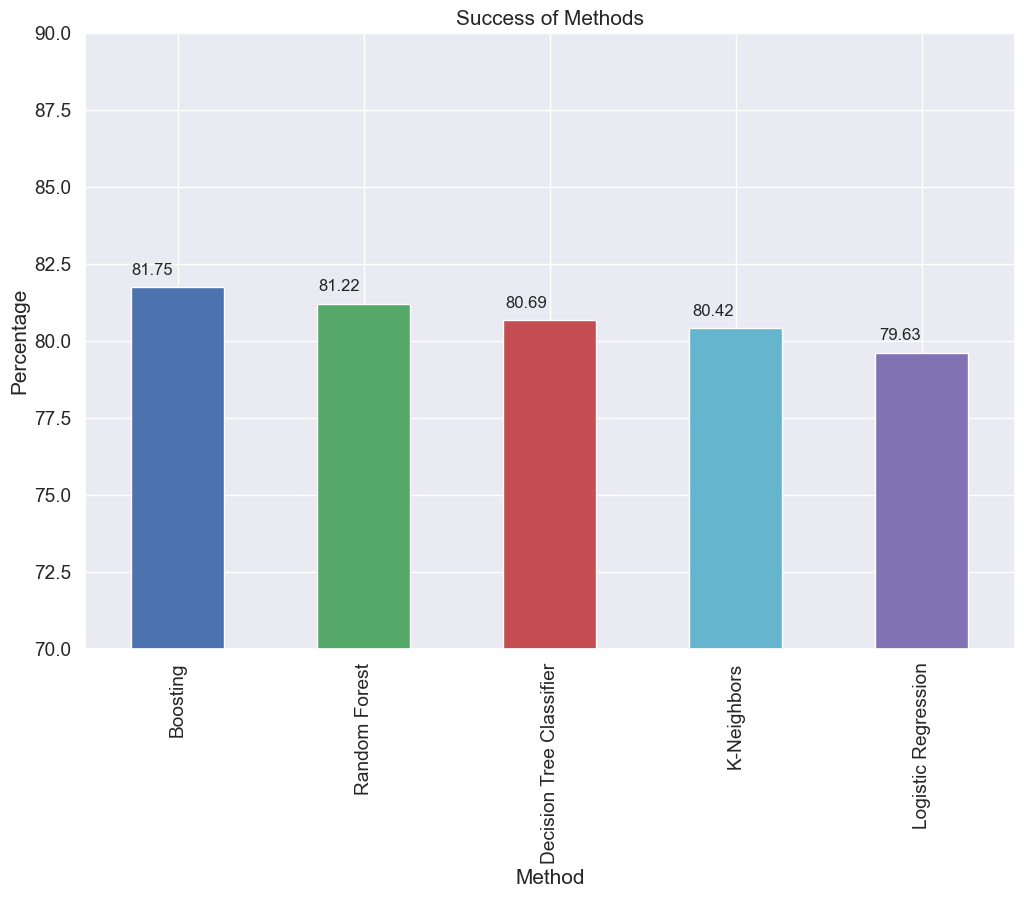

In [37]:
# Define a function to plot the success of methods with different colors for each model
def plot_success():
    # Create a pandas Series from the methodDict and sort it in descending order
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    
    # Define a custom color palette for each model
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    
    # Create a bar plot with specified figure size and color
    plt.figure(figsize=(12, 8))
    
    # Plot the data as a bar chart using the custom color palette
    ax = s.plot(kind='bar', color=colors)
    
    # Annotate the values on the bars
    for p in ax.patches:
        ax.annotate(f'{round(p.get_height(), 2)}', (p.get_x() * 1.005, p.get_height() * 1.005))
    
    # Set the y-axis limits and label the axes
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of Methods')
    
    # Show the plot
    plt.show()

# Call the plot_success function to display the success of methods with different colors
plot_success()


# PREDICTION ON TEST SET

In [64]:
# Create an AdaBoostClassifier
clf = AdaBoostClassifier()

# Fit the classifier on the training data
clf.fit(X, y)

# Generate predictions on the test data
df_test_predictions = clf.predict(X_test)

# Create a DataFrame for the test predictions with 'Index' and 'Treatment' columns
results = pd.DataFrame({'Index': X_test.index, 'Treatment': df_test_predictions})

# Write the predictions to a CSV file
# The 'results.csv' file will be saved in the output section
results.to_csv('results.csv', index=False)

# Display the first few rows of the predictions
results.head()


,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0


In [65]:
# Create a DataFrame with 'Index' and 'Treatment' columns
results = pd.DataFrame({'Index': X_test.index, 'Treatment': df_test_predictions})

# Display the 'results' DataFrame
results


,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0
...,...,...
373,1084,1
374,506,0
375,1142,0
376,1124,0


In [ ]:
import pandas as pd

# Function to evaluate the classification model
def evaluate_classification_model(model, X_test, y_test, plot=False):
    # Make class predictions for the testing set
    y_pred_class = model.predict(X_test)
    
    # Create a DataFrame with index, predicted, and expected values
    results_df = pd.DataFrame({
        'Index': X_test.index,
        'Predicted': y_pred_class,
        'Expected': y_test
    })
    
    # Display the DataFrame
    print(results_df)
    

    return results_df



# Stacking Model

In [ ]:
# Create the StackingClassifier
stacked_model = StackingClassifier(
    estimators=[knn_model, random_forest_model, adaboost_model],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the StackingClassifier on the training data
stacked_model.fit(X_train, y_train)

# Save the StackingClassifier to a .pkl file
joblib.dump(stacked_model, 'stacked_model.pkl')


# Interface Development

In [63]:
from flask import Flask, request
import joblib
import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML

# Load the StackingClassifier model
stacked_model = joblib.load('stacked_model.pkl')

# Create input widgets for features
age_input = widgets.FloatText(description="Age:")
gender_input = widgets.Dropdown(options=['Male', 'Female', 'Transgender'], value='Male', description="Gender:")
family_history_input = widgets.Dropdown(options=['No', 'Yes'], value='No', description="Family History:")
benefits_input = widgets.Dropdown(options=[0, 1, 2], value=0, description="Benefits:")
care_options_input = widgets.Dropdown(options=[0, 1, 2], value=0, description="Care Options:")
anonymity_input = widgets.Dropdown(options=[0, 1, 2], value=0, description="Anonymity:")
leave_input = widgets.Dropdown(options=[0, 1, 2], value=0, description="Leave:")
work_interfere_input = widgets.Dropdown(options=[1, 2, 3, 4, 5], value=1, description="Work Interfere:")
predict_button = widgets.Button(description="Predict Probability")
output_result = widgets.Output()

# Define function to make predictions
def predict_mental_health(btn):
    # Get user input from the widgets
    age = age_input.value
    gender = gender_input.label
    family_history = family_history_input.label
    benefits = benefits_input.label
    care_options = care_options_input.label
    anonymity = anonymity_input.label
    leave = leave_input.label
    work_interfere = work_interfere_input.label

    # Convert categorical features to numerical values
    gender_mapping = {'Male': 0, 'Female': 1, 'Transgender': 2}
    family_history_mapping = {'No': 0, 'Yes': 1}
    
    gender = gender_mapping.get(gender, 0)
    family_history = family_history_mapping.get(family_history, 0)

    # Convert inputs to a numpy array
    features = np.array([[age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]])

    # Make prediction
    prediction = stacked_model.predict(features)

    # Display result
    with output_result:
        # Clear previous output
        output_result.clear_output()

        # Creative message based on the prediction
        if prediction[0] == 0:
            print("Congratulations! You are on a great path to good mental health. Keep it up!")
        elif prediction[0] == 1:
            print("It seems like you may be experiencing some challenges. Remember, you're not alone. Reach out for support.")
        else:
            print("It's important to prioritize your mental health. Consider seeking professional advice and support.")

# Attach the predict_mental_health function to the button's click event
predict_button.on_click(predict_mental_health)

# Display the widgets
display(age_input, gender_input, family_history_input, benefits_input, care_options_input, anonymity_input, leave_input, work_interfere_input, predict_button, output_result)


FloatText(value=0.0, description='Age:')

Dropdown(description='Gender:', options=('Male', 'Female', 'Transgender'), value='Male')

Dropdown(description='Family History:', options=('No', 'Yes'), value='No')

Dropdown(description='Benefits:', options=(0, 1, 2), value=0)

Dropdown(description='Care Options:', options=(0, 1, 2), value=0)

Dropdown(description='Anonymity:', options=(0, 1, 2), value=0)

Dropdown(description='Leave:', options=(0, 1, 2), value=0)

Dropdown(description='Work Interfere:', options=(1, 2, 3, 4, 5), value=1)

Button(description='Predict Probability', style=ButtonStyle())

Output()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feat